In [1]:
# 구글 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 필요한 라이브러리 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 환율과 원자재의 관계

### 환율 데이터 불러오기

In [3]:
# 연도별 환율 데이터
df = pd.read_csv('/content/drive/MyDrive/exrate.csv')
df

,Year,원/달러 환율,엔/달러 환율,원/100엔 환율
0,1970,316.7,357.7,88.5
1,1971,373.3,314.8,118.6
2,1972,398.9,302.0,132.1
3,1973,397.5,280.0,142.0
4,1974,484.0,301.0,160.8
5,1975,484.0,305.2,158.6
6,1976,484.0,292.8,165.3
7,1977,484.0,240.0,201.7
8,1978,484.0,194.6,248.7
9,1979,484.0,239.7,201.9


In [4]:
# 컬럼 이름 변경
df = df.rename(columns = {'원/달러 환율':'One/dallar', '엔/달러 환율':'Yen/dallar', '원/100엔 환율':'One/100Yen'})
df

,Year,One/dallar,Yen/dallar,One/100Yen
0,1970,316.7,357.7,88.5
1,1971,373.3,314.8,118.6
2,1972,398.9,302.0,132.1
3,1973,397.5,280.0,142.0
4,1974,484.0,301.0,160.8
5,1975,484.0,305.2,158.6
6,1976,484.0,292.8,165.3
7,1977,484.0,240.0,201.7
8,1978,484.0,194.6,248.7
9,1979,484.0,239.7,201.9


### 환율 데이터 시각화

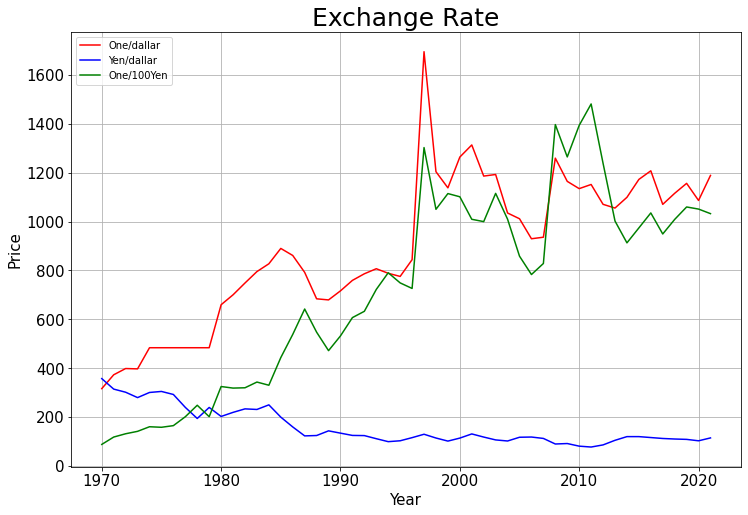

In [5]:
# 연도별 환율 데이터 시각화
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic' # 폰트설정
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False 

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(df["Year"],df["One/dallar"], color="red" , linewidth = 1.5)
plt.plot(df["Year"],df["Yen/dallar"], color="blue" , linewidth = 1.5)
plt.plot(df["Year"],df["One/100Yen"], color="green" , linewidth = 1.5)
plt.title("Exchange Rate", color = "black", fontsize = 25)
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(['One/dallar','Yen/dallar','One/100Yen'], loc = 'upper left', fontsize = 10)
plt.grid(True)
plt.show()

### 원자재 데이터 불러오기

#데이터전처리

In [6]:
# 원자재데이터 불러오기
import pandas as pd

raw_year = pd.read_csv('/content/drive/MyDrive/원자재 연간.csv',encoding = 'euc-kr')
raw_year

,Year,"Crude oil, average($/bbl)","Crude oil, Brent($/bbl)","Crude oil, Dubai($/bbl)","Crude oil, WTI($/bbl)","Coal, Australian($/mt)","Coal, South Afican($/mt)","Natural gas, US($/mmbtu)","Natural gas, Europe($/mmbtu)","Liquefied natural gas, Japan($/mmbtu)",...,Aluminum($/mt),"Iron ore, cfr spot($/dmtu)",Copper($/mt),Lead($/mt),Tin($/mt),Nickel($/mt),Zinc($/mt),Gold($/troy oz),Platinum($/troy oz),Silver($/troy oz)
0,1970,383.207,383.207,383.207,NaN,2470.260,NaN,53.839,142.515,NaN,...,194507.639,3116.328,4.483522e+05,95931.597,1.163382e+06,9.013915e+05,93686.194,11382.198,41962.750,560.559
1,1971,630.877,630.877,630.877,NaN,3240.244,NaN,67.194,186.650,NaN,...,234413.735,3856.189,4.036941e+05,94680.079,1.311018e+06,1.094553e+06,115454.224,15230.640,45930.832,578.615
2,1972,725.998,725.998,725.998,NaN,3829.440,NaN,75.791,215.406,NaN,...,235390.890,4120.637,4.219086e+05,120332.174,1.491870e+06,1.228572e+06,150660.541,23200.024,50712.157,670.152
3,1973,1116.975,1116.975,1116.975,NaN,4563.300,NaN,83.475,274.275,NaN,...,238146.225,4106.175,7.096806e+05,170797.800,1.908874e+06,1.340807e+06,336018.675,38688.675,60491.550,1017.600
4,1974,5309.480,5309.480,5309.480,NaN,8174.760,NaN,140.360,837.320,NaN,...,370172.880,6475.920,9.963140e+05,286653.840,3.961187e+06,1.851421e+06,599956.720,77077.000,89530.320,2279.640
5,1975,5048.120,5048.120,5048.120,NaN,12990.560,NaN,208.120,813.120,NaN,...,420324.960,8373.200,5.976190e+05,199253.120,3.328265e+06,2.212524e+06,360662.280,77938.520,82217.080,2139.280
6,1976,5628.920,5628.920,5628.920,NaN,13145.440,NaN,280.720,842.160,NaN,...,430726.120,10996.480,6.779630e+05,216067.280,3.671401e+06,2.406971e+06,344327.280,60412.880,77270.600,2110.240
7,1977,6083.880,6083.880,6083.880,NaN,13881.120,NaN,382.360,866.360,1340.680,...,553613.720,11161.040,6.334350e+05,299112.000,5.229354e+06,2.477194e+06,285400.280,71496.480,76626.880,2245.760
8,1978,6253.280,6253.280,6253.280,NaN,14065.040,NaN,440.440,1113.200,1471.360,...,641261.280,10381.800,6.605777e+05,320369.280,6.231602e+06,2.230877e+06,287457.280,93528.160,126154.600,2623.280
9,1979,14984.640,15541.240,14432.880,NaN,14950.760,NaN,571.120,1577.840,1785.960,...,775789.080,11374.000,9.608658e+05,584793.000,7.476546e+06,2.897224e+06,358968.280,148428.280,214315.200,5372.400


In [7]:
# 원자재 데이터 정보 확인
raw_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 70 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   52 non-null     int64  
 1   Crude oil, average($/bbl)              52 non-null     float64
 2   Crude oil, Brent($/bbl)                52 non-null     float64
 3   Crude oil, Dubai($/bbl)                52 non-null     float64
 4   Crude oil, WTI($/bbl)                  40 non-null     float64
 5   Coal, Australian($/mt)                 52 non-null     float64
 6   Coal, South Afican($/mt)               38 non-null     float64
 7   Natural gas, US($/mmbtu)               52 non-null     float64
 8   Natural gas, Europe($/mmbtu)           52 non-null     float64
 9   Liquefied natural gas, Japan($/mmbtu)  45 non-null     float64
 10  Natural gas index(2010=100)            45 non-null     float64
 11  Cocoa($/

In [8]:
# 결측값을 0으로 대체
raw_year=raw_year.fillna(0)

In [9]:
# 결측값 확인
raw_year.isna().sum()

Year                         0
Crude oil, average($/bbl)    0
Crude oil, Brent($/bbl)      0
Crude oil, Dubai($/bbl)      0
Crude oil, WTI($/bbl)        0
                            ..
Nickel($/mt)                 0
Zinc($/mt)                   0
Gold($/troy oz)              0
Platinum($/troy oz)          0
Silver($/troy oz)            0
Length: 70, dtype: int64

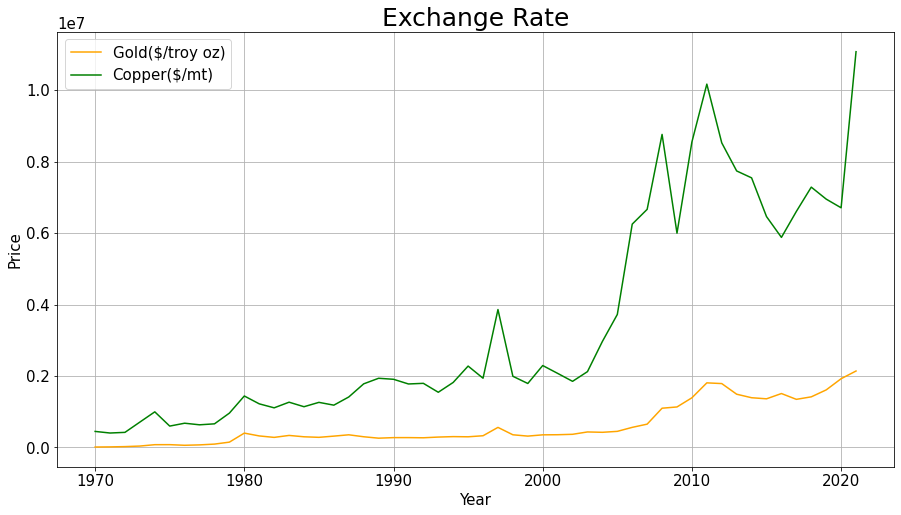

In [10]:
# 'Gold($/troy oz)', 'Copper($/mt)' 데이터 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(raw_year["Year"],raw_year["Gold($/troy oz)"], color="orange" , linewidth = 1.5)
plt.plot(raw_year["Year"],raw_year["Copper($/mt)"], color="green" , linewidth = 1.5)
plt.title("Exchange Rate", color = "black", fontsize = 25)
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(['Gold($/troy oz)','Copper($/mt)'])
plt.grid(True)

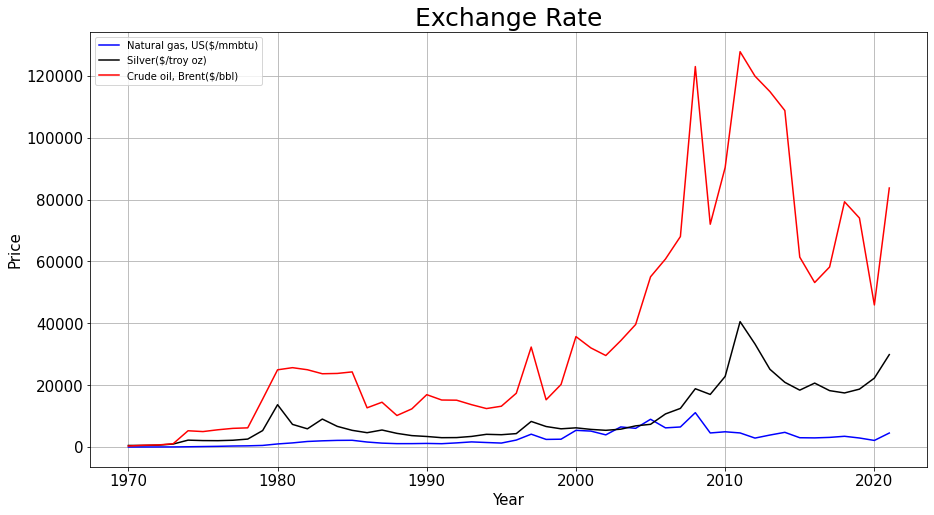

In [11]:
# 'Natural gas, US($/mmbtu)', 'Silver($/troy oz)', 'Crude oil, Brent($/bbl)' 데이터 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(raw_year["Year"],raw_year["Natural gas, US($/mmbtu)"], color="blue" , linewidth = 1.5)
plt.plot(raw_year["Year"],raw_year["Silver($/troy oz)"], color="black" , linewidth = 1.5)
plt.plot(raw_year["Year"],raw_year["Crude oil, Brent($/bbl)"], color="red" , linewidth = 1.5)
plt.title("Exchange Rate", color = "black", fontsize = 25)
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(['Natural gas, US($/mmbtu)','Silver($/troy oz)','Crude oil, Brent($/bbl)'], loc = 'upper left', fontsize = 10)
plt.grid(True)

In [12]:
# 환율 데이터 재확인
df

,Year,One/dallar,Yen/dallar,One/100Yen
0,1970,316.7,357.7,88.5
1,1971,373.3,314.8,118.6
2,1972,398.9,302.0,132.1
3,1973,397.5,280.0,142.0
4,1974,484.0,301.0,160.8
5,1975,484.0,305.2,158.6
6,1976,484.0,292.8,165.3
7,1977,484.0,240.0,201.7
8,1978,484.0,194.6,248.7
9,1979,484.0,239.7,201.9


In [13]:
# 환율 데이터와 원자재 데이터 병합
ret= pd.merge(raw_year, df, how='inner', on=None)
ret

,Year,"Crude oil, average($/bbl)","Crude oil, Brent($/bbl)","Crude oil, Dubai($/bbl)","Crude oil, WTI($/bbl)","Coal, Australian($/mt)","Coal, South Afican($/mt)","Natural gas, US($/mmbtu)","Natural gas, Europe($/mmbtu)","Liquefied natural gas, Japan($/mmbtu)",...,Lead($/mt),Tin($/mt),Nickel($/mt),Zinc($/mt),Gold($/troy oz),Platinum($/troy oz),Silver($/troy oz),One/dallar,Yen/dallar,One/100Yen
0,1970,383.207,383.207,383.207,0.000,2470.260,0.000,53.839,142.515,0.000,...,95931.597,1.163382e+06,9.013915e+05,93686.194,11382.198,41962.750,560.559,316.7,357.7,88.5
1,1971,630.877,630.877,630.877,0.000,3240.244,0.000,67.194,186.650,0.000,...,94680.079,1.311018e+06,1.094553e+06,115454.224,15230.640,45930.832,578.615,373.3,314.8,118.6
2,1972,725.998,725.998,725.998,0.000,3829.440,0.000,75.791,215.406,0.000,...,120332.174,1.491870e+06,1.228572e+06,150660.541,23200.024,50712.157,670.152,398.9,302.0,132.1
3,1973,1116.975,1116.975,1116.975,0.000,4563.300,0.000,83.475,274.275,0.000,...,170797.800,1.908874e+06,1.340807e+06,336018.675,38688.675,60491.550,1017.600,397.5,280.0,142.0
4,1974,5309.480,5309.480,5309.480,0.000,8174.760,0.000,140.360,837.320,0.000,...,286653.840,3.961187e+06,1.851421e+06,599956.720,77077.000,89530.320,2279.640,484.0,301.0,160.8
5,1975,5048.120,5048.120,5048.120,0.000,12990.560,0.000,208.120,813.120,0.000,...,199253.120,3.328265e+06,2.212524e+06,360662.280,77938.520,82217.080,2139.280,484.0,305.2,158.6
6,1976,5628.920,5628.920,5628.920,0.000,13145.440,0.000,280.720,842.160,0.000,...,216067.280,3.671401e+06,2.406971e+06,344327.280,60412.880,77270.600,2110.240,484.0,292.8,165.3
7,1977,6083.880,6083.880,6083.880,0.000,13881.120,0.000,382.360,866.360,1340.680,...,299112.000,5.229354e+06,2.477194e+06,285400.280,71496.480,76626.880,2245.760,484.0,240.0,201.7
8,1978,6253.280,6253.280,6253.280,0.000,14065.040,0.000,440.440,1113.200,1471.360,...,320369.280,6.231602e+06,2.230877e+06,287457.280,93528.160,126154.600,2623.280,484.0,194.6,248.7
9,1979,14984.640,15541.240,14432.880,0.000,14950.760,0.000,571.120,1577.840,1785.960,...,584793.000,7.476546e+06,2.897224e+06,358968.280,148428.280,214315.200,5372.400,484.0,239.7,201.9


In [14]:
# 환율과 원자재 데이터 상관관계 분석   (환율up 원자재 가격up, 환율이 오르면 그만큼 달러로 바꾸는 비용이 증가, 그로 인해 원자재 가격도 증가 ==> "정비례 관계")
ret.corr()

,Year,"Crude oil, average($/bbl)","Crude oil, Brent($/bbl)","Crude oil, Dubai($/bbl)","Crude oil, WTI($/bbl)","Coal, Australian($/mt)","Coal, South Afican($/mt)","Natural gas, US($/mmbtu)","Natural gas, Europe($/mmbtu)","Liquefied natural gas, Japan($/mmbtu)",...,Lead($/mt),Tin($/mt),Nickel($/mt),Zinc($/mt),Gold($/troy oz),Platinum($/troy oz),Silver($/troy oz),One/dallar,Yen/dallar,One/100Yen
Year,1.000000,0.799924,0.795709,0.793682,0.831636,0.812951,0.869321,0.672687,0.758997,0.838234,...,0.867738,0.775639,0.792293,0.903072,0.865620,0.845894,0.768894,0.826014,-0.837915,0.883432
"Crude oil, average($/bbl)",0.799924,1.000000,0.999526,0.999047,0.984707,0.908524,0.909611,0.701657,0.930353,0.973323,...,0.917286,0.881513,0.866025,0.806793,0.856046,0.967444,0.903229,0.636732,-0.592816,0.747602
"Crude oil, Brent($/bbl)",0.795709,0.999526,1.000000,0.999489,0.981804,0.905431,0.906169,0.687094,0.925428,0.974185,...,0.915880,0.882161,0.860448,0.802639,0.858717,0.964057,0.909453,0.627480,-0.587862,0.741102
"Crude oil, Dubai($/bbl)",0.793682,0.999047,0.999489,1.000000,0.980081,0.906497,0.905899,0.673236,0.924997,0.976432,...,0.918953,0.887810,0.854427,0.803138,0.865336,0.961939,0.913347,0.622918,-0.579011,0.736551
"Crude oil, WTI($/bbl)",0.831636,0.984707,0.981804,0.980081,1.000000,0.903965,0.927912,0.756927,0.928504,0.957512,...,0.906037,0.848765,0.885335,0.824693,0.836798,0.969284,0.859745,0.684932,-0.637926,0.792268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Platinum($/troy oz),0.845894,0.967444,0.964057,0.961939,0.969284,0.895722,0.920733,0.747384,0.905174,0.942584,...,0.921620,0.847117,0.903335,0.823891,0.854729,1.000000,0.888639,0.705609,-0.678975,0.832631
Silver($/troy oz),0.768894,0.903229,0.909453,0.913347,0.859745,0.886732,0.866584,0.448982,0.841459,0.919201,...,0.904550,0.942565,0.752612,0.785095,0.947122,0.888639,1.000000,0.568947,-0.533058,0.682827
One/dallar,0.826014,0.636732,0.627480,0.622918,0.684932,0.663767,0.715599,0.722860,0.636919,0.694592,...,0.628179,0.571605,0.627235,0.715804,0.621540,0.705609,0.568947,1.000000,-0.781332,0.918418
Yen/dallar,-0.837915,-0.592816,-0.587862,-0.579011,-0.637926,-0.604657,-0.671329,-0.613678,-0.563056,-0.624662,...,-0.600394,-0.490906,-0.656281,-0.658363,-0.584130,-0.678975,-0.533058,-0.781332,1.000000,-0.875764


# 금리와 원자재 가격의 관계

In [15]:
# 전세계 금리 데이터
import pandas as pd
df1=pd.read_excel('/content/drive/MyDrive/중앙은행_정책금리_OECD__20221111032057.xlsx')
df1

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시점,아시아,대한민국,이스라엘,일본,튀르키예,북아메리카,캐나다,멕시코,미국,...,아이슬란드,노르웨이,폴란드,스웨덴,스위스,영국,유로지역,오세아니아,오스트레일리아,뉴질랜드
0,1980,NaN,-,-,-,-,NaN,-,-,-,...,-,-,-,-,-,14.0,-,NaN,12.00,-
1,1981,NaN,-,-,-,-,NaN,-,-,-,...,-,-,-,-,-,14.38,-,NaN,13.80,-
2,1982,NaN,-,-,-,-,NaN,-,-,-,...,-,9.2,-,-,-,10.0,-,NaN,11.70,-
3,1983,NaN,-,-,-,-,NaN,-,-,9.38,...,-,10.0,-,-,-,9.06,-,NaN,9.50,-
4,1984,NaN,-,-,-,-,NaN,-,-,8.13,...,-,10.2,-,-,-,9.5,-,NaN,12.70,-
5,1985,NaN,-,-,-,-,NaN,-,-,7.75,...,-,10.7,-,-,-,11.38,-,NaN,19.00,-
6,1986,NaN,-,-,-,-,NaN,-,-,5.88,...,-,14.8,-,-,-,10.88,-,NaN,17.20,-
7,1987,NaN,-,-,-,42.36,NaN,-,-,6.81,...,-,13.8,-,-,-,8.38,-,NaN,12.50,-
8,1988,NaN,-,-,-,46.77,NaN,-,-,8.69,...,-,12.0,-,-,-,12.88,-,NaN,15.00,-
9,1989,NaN,-,-,-,26.87,NaN,-,-,8.25,...,-,11.0,-,-,-,14.88,-,NaN,18.00,-


In [16]:
# 필요없는 컬럼 제거
df1=df1.drop(['아시아','북아메리카','남아메리카','유럽','오세아니아'],axis=1)

In [17]:
df1

,시점,대한민국,이스라엘,일본,튀르키예,캐나다,멕시코,미국,칠레,콜롬비아,...,헝가리,아이슬란드,노르웨이,폴란드,스웨덴,스위스,영국,유로지역,오스트레일리아,뉴질랜드
0,1980,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,14.0,-,12.00,-
1,1981,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,14.38,-,13.80,-
2,1982,-,-,-,-,-,-,-,-,-,...,-,-,9.2,-,-,-,10.0,-,11.70,-
3,1983,-,-,-,-,-,-,9.38,-,-,...,-,-,10.0,-,-,-,9.06,-,9.50,-
4,1984,-,-,-,-,-,-,8.13,-,-,...,-,-,10.2,-,-,-,9.5,-,12.70,-
5,1985,-,-,-,-,-,-,7.75,-,-,...,11.5,-,10.7,-,-,-,11.38,-,19.00,-
6,1986,-,-,-,-,-,-,5.88,-,-,...,10.5,-,14.8,-,-,-,10.88,-,17.20,-
7,1987,-,-,-,42.36,-,-,6.81,-,-,...,10.5,-,13.8,-,-,-,8.38,-,12.50,-
8,1988,-,-,-,46.77,-,-,8.69,-,-,...,14.0,-,12.0,-,-,-,12.88,-,15.00,-
9,1989,-,-,-,26.87,-,-,8.25,-,-,...,17.0,-,11.0,-,-,-,14.88,-,18.00,-


In [18]:
# 데이터 정보 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시점       42 non-null     int64  
 1   대한민국     42 non-null     object 
 2   이스라엘     42 non-null     object 
 3   일본       42 non-null     object 
 4   튀르키예     42 non-null     object 
 5   캐나다      42 non-null     object 
 6   멕시코      42 non-null     object 
 7   미국       42 non-null     object 
 8   칠레       42 non-null     object 
 9   콜롬비아     42 non-null     object 
 10  코스타리카    42 non-null     object 
 11  체코       42 non-null     object 
 12  덴마크      42 non-null     object 
 13  헝가리      42 non-null     object 
 14  아이슬란드    42 non-null     object 
 15  노르웨이     42 non-null     object 
 16  폴란드      42 non-null     object 
 17  스웨덴      42 non-null     object 
 18  스위스      42 non-null     object 
 19  영국       42 non-null     object 
 20  유로지역     42 non-null     object 
 21  오스트레일리아  42 non-nu

In [19]:
# 불필요한 데이터 0으로 대체
df1=df1.replace('-',0)

In [20]:
df1

,시점,대한민국,이스라엘,일본,튀르키예,캐나다,멕시코,미국,칠레,콜롬비아,...,헝가리,아이슬란드,노르웨이,폴란드,스웨덴,스위스,영국,유로지역,오스트레일리아,뉴질랜드
0,1980,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,14.00,0.00,12.00,0.00
1,1981,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,14.38,0.00,13.80,0.00
2,1982,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,9.20,0.00,0.00,0.00,10.00,0.00,11.70,0.00
3,1983,0.00,0.00,0.00,0.00,0.00,0.00,9.38,0.00,0.00,...,0.00,0.00,10.00,0.00,0.00,0.00,9.06,0.00,9.50,0.00
4,1984,0.00,0.00,0.00,0.00,0.00,0.00,8.13,0.00,0.00,...,0.00,0.00,10.20,0.00,0.00,0.00,9.50,0.00,12.70,0.00
5,1985,0.00,0.00,0.00,0.00,0.00,0.00,7.75,0.00,0.00,...,11.50,0.00,10.70,0.00,0.00,0.00,11.38,0.00,19.00,0.00
6,1986,0.00,0.00,0.00,0.00,0.00,0.00,5.88,0.00,0.00,...,10.50,0.00,14.80,0.00,0.00,0.00,10.88,0.00,17.20,0.00
7,1987,0.00,0.00,0.00,42.36,0.00,0.00,6.81,0.00,0.00,...,10.50,0.00,13.80,0.00,0.00,0.00,8.38,0.00,12.50,0.00
8,1988,0.00,0.00,0.00,46.77,0.00,0.00,8.69,0.00,0.00,...,14.00,0.00,12.00,0.00,0.00,0.00,12.88,0.00,15.00,0.00
9,1989,0.00,0.00,0.00,26.87,0.00,0.00,8.25,0.00,0.00,...,17.00,0.00,11.00,0.00,0.00,0.00,14.88,0.00,18.00,0.00


In [21]:
# 금리 데이터의 dtype을 float형태로 변환
df1.astype('float')

,시점,대한민국,이스라엘,일본,튀르키예,캐나다,멕시코,미국,칠레,콜롬비아,...,헝가리,아이슬란드,노르웨이,폴란드,스웨덴,스위스,영국,유로지역,오스트레일리아,뉴질랜드
0,1980.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,14.00,0.00,12.00,0.00
1,1981.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,14.38,0.00,13.80,0.00
2,1982.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,9.20,0.00,0.00,0.00,10.00,0.00,11.70,0.00
3,1983.0,0.00,0.00,0.00,0.00,0.00,0.00,9.38,0.00,0.00,...,0.00,0.00,10.00,0.00,0.00,0.00,9.06,0.00,9.50,0.00
4,1984.0,0.00,0.00,0.00,0.00,0.00,0.00,8.13,0.00,0.00,...,0.00,0.00,10.20,0.00,0.00,0.00,9.50,0.00,12.70,0.00
5,1985.0,0.00,0.00,0.00,0.00,0.00,0.00,7.75,0.00,0.00,...,11.50,0.00,10.70,0.00,0.00,0.00,11.38,0.00,19.00,0.00
6,1986.0,0.00,0.00,0.00,0.00,0.00,0.00,5.88,0.00,0.00,...,10.50,0.00,14.80,0.00,0.00,0.00,10.88,0.00,17.20,0.00
7,1987.0,0.00,0.00,0.00,42.36,0.00,0.00,6.81,0.00,0.00,...,10.50,0.00,13.80,0.00,0.00,0.00,8.38,0.00,12.50,0.00
8,1988.0,0.00,0.00,0.00,46.77,0.00,0.00,8.69,0.00,0.00,...,14.00,0.00,12.00,0.00,0.00,0.00,12.88,0.00,15.00,0.00
9,1989.0,0.00,0.00,0.00,26.87,0.00,0.00,8.25,0.00,0.00,...,17.00,0.00,11.00,0.00,0.00,0.00,14.88,0.00,18.00,0.00


In [22]:
# 시점을 Year로 이름 변경
df1 = df1.rename(columns = {'시점':'Year'})
df1

,Year,대한민국,이스라엘,일본,튀르키예,캐나다,멕시코,미국,칠레,콜롬비아,...,헝가리,아이슬란드,노르웨이,폴란드,스웨덴,스위스,영국,유로지역,오스트레일리아,뉴질랜드
0,1980,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,14.00,0.00,12.00,0.00
1,1981,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,14.38,0.00,13.80,0.00
2,1982,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,9.20,0.00,0.00,0.00,10.00,0.00,11.70,0.00
3,1983,0.00,0.00,0.00,0.00,0.00,0.00,9.38,0.00,0.00,...,0.00,0.00,10.00,0.00,0.00,0.00,9.06,0.00,9.50,0.00
4,1984,0.00,0.00,0.00,0.00,0.00,0.00,8.13,0.00,0.00,...,0.00,0.00,10.20,0.00,0.00,0.00,9.50,0.00,12.70,0.00
5,1985,0.00,0.00,0.00,0.00,0.00,0.00,7.75,0.00,0.00,...,11.50,0.00,10.70,0.00,0.00,0.00,11.38,0.00,19.00,0.00
6,1986,0.00,0.00,0.00,0.00,0.00,0.00,5.88,0.00,0.00,...,10.50,0.00,14.80,0.00,0.00,0.00,10.88,0.00,17.20,0.00
7,1987,0.00,0.00,0.00,42.36,0.00,0.00,6.81,0.00,0.00,...,10.50,0.00,13.80,0.00,0.00,0.00,8.38,0.00,12.50,0.00
8,1988,0.00,0.00,0.00,46.77,0.00,0.00,8.69,0.00,0.00,...,14.00,0.00,12.00,0.00,0.00,0.00,12.88,0.00,15.00,0.00
9,1989,0.00,0.00,0.00,26.87,0.00,0.00,8.25,0.00,0.00,...,17.00,0.00,11.00,0.00,0.00,0.00,14.88,0.00,18.00,0.00


In [23]:
# 금리 데이터와 원자재 데이터를 병합
ret2= pd.merge(df1, raw_year, how='inner', on=None)
ret2

,Year,대한민국,이스라엘,일본,튀르키예,캐나다,멕시코,미국,칠레,콜롬비아,...,Aluminum($/mt),"Iron ore, cfr spot($/dmtu)",Copper($/mt),Lead($/mt),Tin($/mt),Nickel($/mt),Zinc($/mt),Gold($/troy oz),Platinum($/troy oz),Silver($/troy oz)
0,1980,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1171263.109,18536.591,1.439961e+06,597704.425,1.106974e+07,4.301677e+06,502329.078,401126.814,448138.090,13725.920
1,1981,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,884542.365,19677.045,1.220236e+06,509074.365,9.918471e+06,4.170133e+06,592377.825,322054.875,313459.740,7369.260
2,1982,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,742487.616,24336.000,1.108553e+06,408545.280,9.603959e+06,3.622313e+06,557691.264,281399.040,245823.552,5937.984
3,1983,0.00,0.00,0.00,0.00,0.00,0.00,9.38,0.00,0.00,...,1144271.065,23069.500,1.266380e+06,338357.970,1.033193e+07,3.717212e+06,608024.515,336122.615,336743.105,9092.565
4,1984,0.00,0.00,0.00,0.00,0.00,0.00,8.13,0.00,0.00,...,1035350.442,21636.510,1.139595e+06,366215.514,1.012199e+07,3.931979e+06,762804.882,298261.152,296051.994,6735.036
5,1985,0.00,0.00,0.00,0.00,0.00,0.00,7.75,0.00,0.00,...,926457.846,23643.712,1.261752e+06,347943.572,1.027205e+07,4.361125e+06,697418.288,283003.482,260383.500,5448.024
6,1986,0.00,0.00,0.00,0.00,0.00,0.00,5.88,0.00,0.00,...,990558.316,22620.364,1.183374e+06,349797.312,5.307404e+06,3.343300e+06,649521.442,316728.166,400585.456,4686.016
7,1987,0.00,0.00,0.00,42.36,0.00,0.00,6.81,0.00,0.00,...,1240234.728,20045.190,1.412275e+06,472876.332,5.280545e+06,3.860260e+06,632881.317,353738.181,440296.956,5554.023
8,1988,0.00,0.00,0.00,46.77,0.00,0.00,8.69,0.00,0.00,...,1744769.686,16623.630,1.779802e+06,448926.943,4.824020e+06,9.425749e+06,849316.991,298985.905,362805.594,4467.173
9,1989,0.00,0.00,0.00,26.87,0.00,0.00,8.25,0.00,0.00,...,1326076.296,18913.268,1.935779e+06,457697.008,5.799999e+06,9.044239e+06,1127300.092,259219.828,346351.344,3744.596


In [24]:
# 금리 데이터와 원자재 데이터 상관관계 분석 (금리 up => 원자재 가격 up,금리가 오르면 원자재 가격이 오름 ==> "정비례 관계")
ret2.corr()

,Year,대한민국,이스라엘,일본,튀르키예,캐나다,멕시코,미국,칠레,콜롬비아,...,Aluminum($/mt),"Iron ore, cfr spot($/dmtu)",Copper($/mt),Lead($/mt),Tin($/mt),Nickel($/mt),Zinc($/mt),Gold($/troy oz),Platinum($/troy oz),Silver($/troy oz)
Year,1.000000,0.513061,0.000209,-0.063124,-0.183526,0.116308,0.745204,-0.582981,0.482312,0.187650,...,0.774337,0.751899,0.859489,0.869990,0.736757,0.717045,0.877076,0.852964,0.788229,0.720461
대한민국,0.513061,1.000000,0.152185,0.375045,-0.006174,0.324268,0.671909,-0.327923,0.533171,0.147728,...,0.590588,0.432406,0.428241,0.405991,0.229081,0.662709,0.431527,0.242612,0.596675,0.304297
이스라엘,0.000209,0.152185,1.000000,0.093758,0.574412,0.730187,-0.080129,0.176029,0.592370,0.785186,...,0.149522,-0.149059,-0.176007,-0.206897,-0.314290,-0.036123,-0.091231,-0.278372,-0.123425,-0.250366
일본,-0.063124,0.375045,0.093758,1.000000,-0.053618,0.191753,0.122944,0.041755,0.254991,0.108985,...,0.170636,0.161468,0.081411,0.132469,-0.067978,0.475666,0.062882,-0.143033,0.218730,-0.004068
튀르키예,-0.183526,-0.006174,0.574412,-0.053618,1.000000,0.670824,-0.411956,0.395466,0.155797,0.359819,...,-0.130139,-0.380622,-0.389530,-0.431995,-0.508684,-0.298689,-0.273610,-0.433047,-0.397437,-0.478037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nickel($/mt),0.717045,0.662709,-0.036123,0.475666,-0.298689,0.092786,0.709105,-0.431016,0.530465,0.128351,...,0.863599,0.853465,0.859317,0.826486,0.670002,1.000000,0.806639,0.651203,0.870647,0.688145
Zinc($/mt),0.877076,0.431527,-0.091231,0.062882,-0.273610,0.039274,0.683490,-0.444213,0.470888,0.169399,...,0.846062,0.777208,0.903625,0.904802,0.792668,0.806639,1.000000,0.821203,0.758362,0.729195
Gold($/troy oz),0.852964,0.242612,-0.278372,-0.143033,-0.433047,-0.253655,0.553966,-0.646073,0.267140,-0.037399,...,0.682692,0.855124,0.924098,0.918259,0.936510,0.651203,0.821203,1.000000,0.811509,0.935429
Platinum($/troy oz),0.788229,0.596675,-0.123425,0.218730,-0.397437,-0.073250,0.674988,-0.636349,0.513812,0.077119,...,0.838027,0.921308,0.921074,0.904995,0.813798,0.870647,0.758362,0.811509,1.000000,0.862515


# 금리 환율 관계

In [25]:
# 금리 데이터와 환율 데이터 병합
ret3 = pd.merge(df1, df, how='inner', on=None)
ret3

,Year,대한민국,이스라엘,일본,튀르키예,캐나다,멕시코,미국,칠레,콜롬비아,...,폴란드,스웨덴,스위스,영국,유로지역,오스트레일리아,뉴질랜드,One/dallar,Yen/dallar,One/100Yen
0,1980,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,14.00,0.00,12.00,0.00,659.9,202.9,325.3
1,1981,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,14.38,0.00,13.80,0.00,700.5,219.6,318.9
2,1982,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,10.00,0.00,11.70,0.00,748.8,233.9,320.2
3,1983,0.00,0.00,0.00,0.00,0.00,0.00,9.38,0.00,0.00,...,0.00,0.00,0.00,9.06,0.00,9.50,0.00,795.5,231.5,343.6
4,1984,0.00,0.00,0.00,0.00,0.00,0.00,8.13,0.00,0.00,...,0.00,0.00,0.00,9.50,0.00,12.70,0.00,827.4,250.3,330.6
5,1985,0.00,0.00,0.00,0.00,0.00,0.00,7.75,0.00,0.00,...,0.00,0.00,0.00,11.38,0.00,19.00,0.00,890.2,200.1,443.7
6,1986,0.00,0.00,0.00,0.00,0.00,0.00,5.88,0.00,0.00,...,0.00,0.00,0.00,10.88,0.00,17.20,0.00,861.4,160.0,538.4
7,1987,0.00,0.00,0.00,42.36,0.00,0.00,6.81,0.00,0.00,...,0.00,0.00,0.00,8.38,0.00,12.50,0.00,792.3,123.4,642.3
8,1988,0.00,0.00,0.00,46.77,0.00,0.00,8.69,0.00,0.00,...,0.00,0.00,0.00,12.88,0.00,15.00,0.00,684.1,124.9,547.7
9,1989,0.00,0.00,0.00,26.87,0.00,0.00,8.25,0.00,0.00,...,0.00,0.00,0.00,14.88,0.00,18.00,0.00,679.6,144.0,472.1


In [26]:
# 금리 데이터와 환율 데이터 상관관계 분석 (금리가 오르면 환율이 하락, 환율이 오르면 금리가 하락 ==> "반비례 관계")
ret3.corr()

,Year,대한민국,이스라엘,일본,튀르키예,캐나다,멕시코,미국,칠레,콜롬비아,...,폴란드,스웨덴,스위스,영국,유로지역,오스트레일리아,뉴질랜드,One/dallar,Yen/dallar,One/100Yen
Year,1.000000,0.513061,0.000209,-0.063124,-0.183526,0.116308,0.745204,-0.582981,0.482312,0.187650,...,0.199650,0.232046,0.043610,-0.924503,0.174032,-0.862910,0.431632,0.649597,-0.701646,0.778753
대한민국,0.513061,1.000000,0.152185,0.375045,-0.006174,0.324268,0.671909,-0.327923,0.533171,0.147728,...,0.519692,0.730640,0.806560,-0.492175,0.810465,-0.421288,0.957483,0.478140,-0.426195,0.542774
이스라엘,0.000209,0.152185,1.000000,0.093758,0.574412,0.730187,-0.080129,0.176029,0.592370,0.785186,...,0.515621,0.193661,0.281772,-0.055190,0.359389,-0.185621,0.161418,0.387449,-0.267853,0.318610
일본,-0.063124,0.375045,0.093758,1.000000,-0.053618,0.191753,0.122944,0.041755,0.254991,0.108985,...,0.131892,0.492575,0.545482,0.066864,0.443469,0.111287,0.435690,-0.040470,-0.085680,0.064682
튀르키예,-0.183526,-0.006174,0.574412,-0.053618,1.000000,0.670824,-0.411956,0.395466,0.155797,0.359819,...,0.450514,-0.170282,0.319334,0.156773,0.280734,-0.031422,-0.029174,0.088774,-0.273349,0.089664
캐나다,0.116308,0.324268,0.730187,0.191753,0.670824,1.000000,0.062305,0.176543,0.468264,0.514996,...,0.550606,0.249540,0.472542,-0.171357,0.516657,-0.288970,0.355564,0.313567,-0.403462,0.337579
멕시코,0.745204,0.671909,-0.080129,0.122944,-0.411956,0.062305,1.000000,-0.499825,0.350724,0.034596,...,0.099016,0.623197,0.233365,-0.668466,0.360225,-0.583183,0.689749,0.427525,-0.465161,0.546737
미국,-0.582981,-0.327923,0.176029,0.041755,0.395466,0.176543,-0.499825,1.000000,-0.220834,0.038902,...,-0.023080,-0.227271,0.084341,0.616657,-0.004194,0.623253,-0.245421,-0.374963,0.309969,-0.489272
칠레,0.482312,0.533171,0.592370,0.254991,0.155797,0.468264,0.350724,-0.220834,1.000000,0.792884,...,0.595542,0.332825,0.413485,-0.477142,0.494972,-0.520200,0.498778,0.686343,-0.457405,0.655523
콜롬비아,0.187650,0.147728,0.785186,0.108985,0.359819,0.514996,0.034596,0.038902,0.792884,1.000000,...,0.437430,0.082563,0.198794,-0.199450,0.239150,-0.325289,0.159069,0.551838,-0.275031,0.416084


# 국가별 환율 데이터를 이용하여 환율 예측

In [27]:
 # 국가별 환율데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/euro-daily-hist_1999_2022.csv')
data

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-10-04,1.5318,1.9558,5.0589,1.3503,0.9767,7.0384,NaN,24.544,7.4374,...,4.9418,NaN,10.8166,1.4148,NaN,NaN,37.1600,18.3374,0.9891,17.5437
1,2022-10-03,1.5128,1.9558,5.1780,1.3412,0.9658,6.9481,NaN,24.527,7.4366,...,4.9479,NaN,10.8743,1.4015,NaN,NaN,37.1810,18.1240,0.9764,17.5871
2,2022-09-30,1.5076,1.9558,5.2584,1.3401,0.9561,6.9368,NaN,24.549,7.4365,...,4.9490,NaN,10.8993,1.4001,NaN,NaN,36.8230,18.0841,0.9748,17.5353
3,2022-09-29,1.4982,1.9558,5.2521,1.3294,0.9538,6.9223,NaN,24.687,7.4365,...,4.9481,NaN,10.9580,1.3961,NaN,NaN,36.9460,18.0000,0.9706,17.4466
4,2022-09-28,1.4924,1.9558,5.1728,1.3157,0.9437,6.9199,NaN,24.650,7.4368,...,4.9485,NaN,10.9194,1.3846,NaN,NaN,36.6870,17.7311,0.9565,17.2916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6143,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6144,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6145,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [28]:
# 값에 '-'을 None으로 대체
data = data.replace('-',None)
data

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-10-04,1.5318,1.9558,5.0589,1.3503,0.9767,7.0384,NaN,24.544,7.4374,...,4.9418,NaN,10.8166,1.4148,NaN,NaN,37.1600,18.3374,0.9891,17.5437
1,2022-10-03,1.5128,1.9558,5.1780,1.3412,0.9658,6.9481,NaN,24.527,7.4366,...,4.9479,NaN,10.8743,1.4015,NaN,NaN,37.1810,18.1240,0.9764,17.5871
2,2022-09-30,1.5076,1.9558,5.2584,1.3401,0.9561,6.9368,NaN,24.549,7.4365,...,4.9490,NaN,10.8993,1.4001,NaN,NaN,36.8230,18.0841,0.9748,17.5353
3,2022-09-29,1.4982,1.9558,5.2521,1.3294,0.9538,6.9223,NaN,24.687,7.4365,...,4.9481,NaN,10.9580,1.3961,NaN,NaN,36.9460,18.0000,0.9706,17.4466
4,2022-09-28,1.4924,1.9558,5.1728,1.3157,0.9437,6.9199,NaN,24.650,7.4368,...,4.9485,NaN,10.9194,1.3846,NaN,NaN,36.6870,17.7311,0.9565,17.2916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6143,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6144,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6145,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [29]:
# 컬럼 이름 변경
data.columns = ['Date','Australia','Bulgaria','Brazil','Canada','Swiss','China','Cyprus','Czech','Denmark','Estonia','UK','Greece','Hongkong','Croatia','Hungary','Indonesia','Israel','India','Iceland','Japan','Korea','Lithuania','Latvia','Malta','Mexico','Malaysia','Norway','New Zealand','Philippine','Poland','Rumania','Russia','Sweden','Singapore','Slovenia','Slovakia','tie','turkey','USA','South Africa']
data

,Date,Australia,Bulgaria,Brazil,Canada,Swiss,China,Cyprus,Czech,Denmark,...,Rumania,Russia,Sweden,Singapore,Slovenia,Slovakia,tie,turkey,USA,South Africa
0,2022-10-04,1.5318,1.9558,5.0589,1.3503,0.9767,7.0384,NaN,24.544,7.4374,...,4.9418,NaN,10.8166,1.4148,NaN,NaN,37.1600,18.3374,0.9891,17.5437
1,2022-10-03,1.5128,1.9558,5.1780,1.3412,0.9658,6.9481,NaN,24.527,7.4366,...,4.9479,NaN,10.8743,1.4015,NaN,NaN,37.1810,18.1240,0.9764,17.5871
2,2022-09-30,1.5076,1.9558,5.2584,1.3401,0.9561,6.9368,NaN,24.549,7.4365,...,4.9490,NaN,10.8993,1.4001,NaN,NaN,36.8230,18.0841,0.9748,17.5353
3,2022-09-29,1.4982,1.9558,5.2521,1.3294,0.9538,6.9223,NaN,24.687,7.4365,...,4.9481,NaN,10.9580,1.3961,NaN,NaN,36.9460,18.0000,0.9706,17.4466
4,2022-09-28,1.4924,1.9558,5.1728,1.3157,0.9437,6.9199,NaN,24.650,7.4368,...,4.9485,NaN,10.9194,1.3846,NaN,NaN,36.6870,17.7311,0.9565,17.2916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6143,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6144,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6145,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [30]:
# object형태를 float형태로 변환시키기
data = data.astype({'Australia':'float', 'Bulgaria':'float', 'Brazil':'float','Canada':'float','Swiss':'float','China':'float','Czech':'float','Denmark':'float','UK':'float','Hongkong':'float','Croatia':'float','Hungary':'float','Indonesia':'float','Israel':'float','India':'float','Japan':'float','Korea':'float','Mexico':'float','Malaysia':'float','Norway':'float','Philippine':'float','Poland':'float','Rumania':'float','Russia':'float','Sweden':'float','Singapore':'float','tie':'float','turkey':'float','USA':'float','South Africa':'float','New Zealand':'float'})

In [31]:
# 결측값의 개수가 1000개 이상인 컬럼들 삭제
data = data.drop(['Cyprus','Estonia','Greece','Iceland','Lithuania','Latvia','Malta','Slovenia','Slovakia'], axis = 1)
data

,Date,Australia,Bulgaria,Brazil,Canada,Swiss,China,Czech,Denmark,UK,...,Philippine,Poland,Rumania,Russia,Sweden,Singapore,tie,turkey,USA,South Africa
0,2022-10-04,1.5318,1.9558,5.0589,1.3503,0.9767,7.0384,24.544,7.4374,0.87273,...,58.104,4.8193,4.9418,NaN,10.8166,1.4148,37.1600,18.3374,0.9891,17.5437
1,2022-10-03,1.5128,1.9558,5.1780,1.3412,0.9658,6.9481,24.527,7.4366,0.87070,...,57.599,4.8320,4.9479,NaN,10.8743,1.4015,37.1810,18.1240,0.9764,17.5871
2,2022-09-30,1.5076,1.9558,5.2584,1.3401,0.9561,6.9368,24.549,7.4365,0.88300,...,57.276,4.8483,4.9490,NaN,10.8993,1.4001,36.8230,18.0841,0.9748,17.5353
3,2022-09-29,1.4982,1.9558,5.2521,1.3294,0.9538,6.9223,24.687,7.4365,0.89485,...,56.860,4.8570,4.9481,NaN,10.9580,1.3961,36.9460,18.0000,0.9706,17.4466
4,2022-09-28,1.4924,1.9558,5.1728,1.3157,0.9437,6.9199,24.650,7.4368,0.90268,...,56.528,4.8043,4.9485,NaN,10.9194,1.3846,36.6870,17.7311,0.9565,17.2916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,34.938,7.4433,0.70940,...,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,42.5590,0.3718,1.1659,6.7855
6143,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,34.886,7.4431,0.70585,...,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,42.1678,0.3701,1.1632,6.8283
6144,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,34.850,7.4452,0.70760,...,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,42.6949,0.3722,1.1743,6.7307
6145,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,34.917,7.4495,0.71220,...,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,42.5048,0.3728,1.1790,6.7975


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6147 entries, 0 to 6146
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6147 non-null   object 
 1   Australia     6147 non-null   float64
 2   Bulgaria      5745 non-null   float64
 3   Brazil        5879 non-null   float64
 4   Canada        6147 non-null   float64
 5   Swiss         6147 non-null   float64
 6   China         5879 non-null   float64
 7   Czech         6147 non-null   float64
 8   Denmark       6147 non-null   float64
 9   UK            6147 non-null   float64
 10  Hongkong      6147 non-null   float64
 11  Croatia       5879 non-null   float64
 12  Hungary       6147 non-null   float64
 13  Indonesia     6147 non-null   float64
 14  Israel        5879 non-null   float64
 15  India         5879 non-null   float64
 16  Japan         6147 non-null   float64
 17  Korea         6147 non-null   float64
 18  Mexico        6147 non-null 

In [47]:
# 결측값에 각 컬럼의 평균값 넣어주기
data['Bulgaria'] = data['Bulgaria'].fillna(data['Bulgaria'].mean())
data['Brazil'] = data['Brazil'].fillna(data['Brazil'].mean())
data['China'] = data['China'].fillna(data['China'].mean())
data['Croatia'] = data['Croatia'].fillna(data['Croatia'].mean())
data['Israel'] = data['Israel'].fillna(data['Israel'].mean())
data['India'] = data['India'].fillna(data['India'].mean())
data['Rumania'] = data['Rumania'].fillna(data['Rumania'].mean())
data['Russia'] = data['Russia'].fillna(data['Russia'].mean())
data['turkey'] = data['turkey'].fillna(data['turkey'].mean())

In [48]:
data.isna().sum()

Date            0
Australia       0
Bulgaria        0
Brazil          0
Canada          0
Swiss           0
China           0
Czech           0
Denmark         0
UK              0
Hongkong        0
Croatia         0
Hungary         0
Indonesia       0
Israel          0
India           0
Japan           0
Korea           0
Mexico          0
Malaysia        0
Norway          0
New Zealand     0
Philippine      0
Poland          0
Rumania         0
Russia          0
Sweden          0
Singapore       0
tie             0
turkey          0
USA             0
South Africa    0
dtype: int64

In [49]:
# 데이터 정렬
data.sort_values(by = 'Date', inplace = True)
data = data.reset_index(drop = True)
data

,Date,Australia,Bulgaria,Brazil,Canada,Swiss,China,Czech,Denmark,UK,...,Philippine,Poland,Rumania,Russia,Sweden,Singapore,tie,turkey,USA,South Africa
0,1999-01-04,1.9100,1.954569,3.380851,1.8004,1.6168,8.517268,35.107,7.4501,0.71110,...,45.510,4.0712,1.3111,25.287500,9.4696,1.9554,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,1.954569,3.380851,1.7965,1.6123,8.517268,34.917,7.4495,0.71220,...,44.745,4.0245,1.3168,26.587600,9.4025,1.9655,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,1.954569,3.380851,1.7711,1.6116,8.517268,34.850,7.4452,0.70760,...,44.872,4.0065,1.3168,27.431500,9.3050,1.9699,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,1.954569,3.380851,1.7602,1.6165,8.517268,34.886,7.4431,0.70585,...,44.436,4.0165,1.3092,26.987600,9.1800,1.9436,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,1.954569,3.380851,1.7643,1.6138,8.517268,34.938,7.4433,0.70940,...,44.295,4.0363,1.3143,27.207500,9.1650,1.9537,42.5590,0.3718,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,2022-09-28,1.4924,1.955800,5.172800,1.3157,0.9437,6.919900,24.650,7.4368,0.90268,...,56.528,4.8043,4.9485,48.094392,10.9194,1.3846,36.6870,17.7311,0.9565,17.2916
6143,2022-09-29,1.4982,1.955800,5.252100,1.3294,0.9538,6.922300,24.687,7.4365,0.89485,...,56.860,4.8570,4.9481,48.094392,10.9580,1.3961,36.9460,18.0000,0.9706,17.4466
6144,2022-09-30,1.5076,1.955800,5.258400,1.3401,0.9561,6.936800,24.549,7.4365,0.88300,...,57.276,4.8483,4.9490,48.094392,10.8993,1.4001,36.8230,18.0841,0.9748,17.5353
6145,2022-10-03,1.5128,1.955800,5.178000,1.3412,0.9658,6.948100,24.527,7.4366,0.87070,...,57.599,4.8320,4.9479,48.094392,10.8743,1.4015,37.1810,18.1240,0.9764,17.5871


# 기계학습 부분 - 환율 예측 개선 전

<ipython-input-50-83c33795fc90>:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


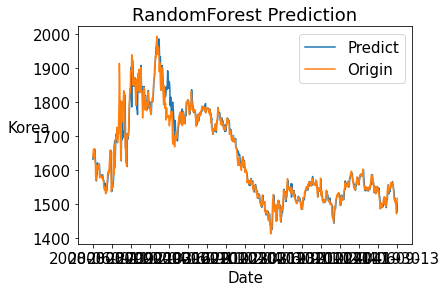

Average error: 0.9273%
839
839


In [50]:
import pickle
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np



if __name__ == '__main__':
    x_train = []
    y_train = []
    for i in range(1000, 2444):
        temp = []
        for j in range(0, 31):
            if j == 30:
                y_train.append(data['Korea'][i+j] - data['Korea'][i])
            else:
                temp.append(data['Korea'][i+j] - data['Korea'][i])  
        x_train.append(temp)

    x_test = []
    y_test = []
    x_base = []
    for i in range(2444, 3283):
        temp = []
        x_base.append(data['Korea'][i])
        for j in range(0, 31):
            if j == 30:
                y_test.append(data['Korea'][i+j] - data['Korea'][i])
            else:
                temp.append(data['Korea'][i+j] - data['Korea'][i])
        x_test.append(temp)
    
    model = RandomForestRegressor(n_estimators=200).fit(x_train, y_train)        
    y_predict = model.predict(x_test)



   
    for i in range(len(x_base)):
        y_predict[i] = y_predict[i] + x_base[i]
    
   
    date_plot = data['Date'][2474:3313]
    data_plot = data['Korea'][2474:3313]
    date_plot.reset_index(inplace = True, drop = True)
    data_plot.reset_index(inplace = True, drop = True)
    plt.plot(date_plot, y_predict)
    plt.plot(date_plot, data_plot)
    plt.legend(['Predict','Origin'])
    ax = plt.subplot(111)
    plt.title("RandomForest Prediction")    
    ax.set_xlabel('Date')
    ax.set_ylabel('Korea', rotation = 0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(52.3))
    plt.show()
    
    
    error = 0
    for i in range(len(data_plot)):
        error = error + abs(data_plot[i] - y_predict[i])/data_plot[i]
    print('Average error: ' + "{:.4f}".format(error/len(data_plot)*100) + '%')
print(len(y_predict))
print(len(data['Date'][2474:3313]))

# 기계학습 부분 - 환율 예측 개선 후 ==> "환율 예측과 환율 예측 전 후 비교"

<ipython-input-51-d07d30dea39d>:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


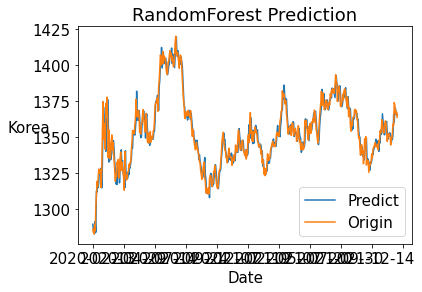

Average error: 0.3540%
0.950216210608829


In [51]:
import pickle         
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from sklearn.metrics import accuracy_score



if __name__ == '__main__':
    x_train = []
    y_train = []
    for i in range(1500, 5437):  #학습데이터
        temp = []
        for j in range(0, 31):
            if j == 30:
                y_train.append(data['Korea'][i+j] - data['Korea'][i])
            else:
                temp.append(data['Korea'][i+j] - data['Korea'][i])   # 
        x_train.append(temp)

    x_test = []
    y_test = []
    x_base = []

    for i in range(5437, 5952): #테스트 데이터
        temp = []
        x_base.append(data['Korea'][i])
        for j in range(0, 31):
            if j == 30:
                y_test.append(data['Korea'][i+j] - data['Korea'][i])
            else:
                temp.append(data['Korea'][i+j] - data['Korea'][i])
        x_test.append(temp)

    model = RandomForestRegressor(n_estimators=100).fit(x_train, y_train)        
    y_predict = model.predict(x_test)

    for i in range(len(x_base)):
        y_predict[i] = y_predict[i] + x_base[i]
    # 그래프
    date_plot = data['Date'][5467:5982]
    data_plot = data['Korea'][5467:5982]
    date_plot.reset_index(inplace = True, drop = True)
    data_plot.reset_index(inplace = True, drop = True)
    plt.plot(date_plot, y_predict)
    plt.plot(date_plot, data_plot)
    plt.legend(['Predict','Origin'])
    ax = plt.subplot(111)
    plt.title("RandomForest Prediction")    
    ax.set_xlabel('Date')
    ax.set_ylabel('Korea', rotation = 0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(52.3))
    plt.show()
    
    # count deviation
    # the goal is to reduce this value
    error = 0
    for i in range(len(data_plot)):
        error = error + abs(data_plot[i] - y_predict[i])/data_plot[i]
    print('Average error: ' + "{:.4f}".format(error/len(data_plot)*100) + '%')

accuracy=model.score(x_test,y_test)
#정확도
print(accuracy)

In [52]:
# 설정한 환율 구간
exchange_date=data[['Date','Korea']][5467:5982]

In [53]:
# 인덱스 5467~592라서 인덱스 초기화
exchange_date=exchange_date.reset_index()

In [54]:
# y_predict 데이터 프레임화
predict_exchange=pd.DataFrame(y_predict)

In [55]:
exchange_date

,index,Date,Korea
0,5467,2020-02-13,1286.02
1,5468,2020-02-14,1283.75
2,5469,2020-02-17,1282.70
3,5470,2020-02-18,1288.74
4,5471,2020-02-19,1284.75
...,...,...,...
510,5977,2022-02-07,1371.76
511,5978,2022-02-08,1367.88
512,5979,2022-02-09,1365.72
513,5980,2022-02-10,1367.52


In [56]:
predict_exchange

,0
0,1289.4227
1,1285.2409
2,1282.9801
3,1282.7649
4,1291.4579
...,...
510,1370.1072
511,1370.1503
512,1366.6533
513,1365.1346


In [57]:
# 예측전 환율과 예측 환율 합치기
original_predict=pd.concat([exchange_date, predict_exchange], axis=1)

In [58]:
original_predict

,index,Date,Korea,0
0,5467,2020-02-13,1286.02,1289.4227
1,5468,2020-02-14,1283.75,1285.2409
2,5469,2020-02-17,1282.70,1282.9801
3,5470,2020-02-18,1288.74,1282.7649
4,5471,2020-02-19,1284.75,1291.4579
...,...,...,...,...
510,5977,2022-02-07,1371.76,1370.1072
511,5978,2022-02-08,1367.88,1370.1503
512,5979,2022-02-09,1365.72,1366.6533
513,5980,2022-02-10,1367.52,1365.1346


In [59]:
# 필요 없는 인덱스 삭제
original_predict=original_predict.drop('index',axis='columns')

In [60]:
original_predict

,Date,Korea,0
0,2020-02-13,1286.02,1289.4227
1,2020-02-14,1283.75,1285.2409
2,2020-02-17,1282.70,1282.9801
3,2020-02-18,1288.74,1282.7649
4,2020-02-19,1284.75,1291.4579
...,...,...,...
510,2022-02-07,1371.76,1370.1072
511,2022-02-08,1367.88,1370.1503
512,2022-02-09,1365.72,1366.6533
513,2022-02-10,1367.52,1365.1346


# 최종 예측값

In [61]:
# 컬럼 이름 변경
original_predict.rename(columns={0:'Korea_predict'})  

,Date,Korea,Korea_predict
0,2020-02-13,1286.02,1289.4227
1,2020-02-14,1283.75,1285.2409
2,2020-02-17,1282.70,1282.9801
3,2020-02-18,1288.74,1282.7649
4,2020-02-19,1284.75,1291.4579
...,...,...,...
510,2022-02-07,1371.76,1370.1072
511,2022-02-08,1367.88,1370.1503
512,2022-02-09,1365.72,1366.6533
513,2022-02-10,1367.52,1365.1346
